# **PROJECT SUBMITTED BY:**
#     **PALAK**

#               *** TITLE: Marketing Campaign For Banking Products***

# **PROBLEM STATEMENT**
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

# **Objective:**

The classification goal is to predict the likelihood of a liability customer buying personal
loans.

# **Steps and tasks:**

1. Import the datasets and libraries, check datatype, statistical summary, shape, null
values etc
2. Check if you need to clean the data for any of the variables
3. EDA: Study the data distribution in each attribute and target variable, share your
findings.
● Number of unique in each column?
● Number of people with zero mortgage?
● Number of people with zero credit card spending per month?
● Value counts of all categorical columns.
● Univariate and Bivariate analysis
4. Apply necessary transformations for the feature variables
5. Normalise your data and split the data into training and test set in the ratio of 70:30
respectively
6. Use the Logistic Regression model to predict the likelihood of a customer buying
personal loans.
7. Print all the metrics related for evaluating the model performance
8. Build various other classification algorithms and compare their performance
9. Give a business understanding of your model


# STEP 1.1-Importing The Libraries For EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# STEP 1.2- Importing The Dataset File

In [ ]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv("/content/personal loan.csv")


Saving personal loan.csv to personal loan.csv


# STEP-1.3 Checking Parameters such as datatype,statistical summary,shape ,nullvalues and some other parameters

In [ ]:
df.columns     #It will give all the columns of the file 

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
df.info()                          #return the datatypes of different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()            #It gives all the statistical measures of data like the mean ,minimum value,etc

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.head()            #It returns the first 5 rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail()               #It returns the last 5 rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
df.shape                     #It gives number of rows and columns

(5000, 14)

In [ ]:
df.isnull().sum()   #It tells whether the data contains any null value or not and returns a sum of the number of null values for each column.

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df.dropna()                        #It drops the value which is null

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


#**STEP-2** **Dropping the irrelevant Columns**

In [ ]:
# first determine correlation between age and experience
experience=df["Experience"]
age=df["Age"]
correlation=age.corr(experience)
correlation                   #(it says that both age and experience are correlated )

0.9942148569683321

In [ ]:
#Now id is the variable which has no signal because it does not have to do anything with the personal loan variable. so we will drop it.
df=df.drop(["ID"],axis=1)
df.head(10)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# **step 2 continued**
**now we have to replace the negative values in the experience column with the positive values so in order to do this we will set the negative values to the median of the remaining values in that particular column.**

In [ ]:
df[df["Experience"]<0]["Experience"].count()

52

**replace the negative values in the Experience column with the Median**

In [ ]:
value=int(df["Experience"].median())
data=df[df["Experience"]<0]["Experience"]
for i in range(len(df)):
  if df["Experience"].iloc[i]<0:
    df["Experience"].iloc[i]=value
df["Experience"]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

In [ ]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df[df["Experience"]<0]["Experience"].count()           #it returns 0 means now there are no negative values.

0

# **STEP-3 EXPLORATORY DATA ANALYSIS**

**1. Number of uniques in each column**

In [ ]:
df.nunique()

Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

now looking into the nature of Variables:

1) ID: We have already set this as our Index column and it is already omitted as it has no relation with the personal loan variable.

2) Age: The age of customer is a numerical data.

3) Income: Annual Income of customers is a numerical type of data. It is the variable which is important to predict the value of target variable that whether the person will get loan or not.

4) ZIP Code: address of the Customers.It is not an important variable while determining the target variable.

5) Family: size of family of the customer.

6) CC Avg: Credit cards spending per month ($000). This is a Numerical data type.

7) Education: This is a Nominal categorical data type.

8) Mortgage: It is Numerical data type which gives the value of House mortgage.
9) Personal Load: This is our feature to be predicted. The data in the column is categorical and nominal.

10) Securities Account: This Nominal Categorical data type indicates if the Customer has an account in the bank.

11) CD Account: This is one of our Categorical data columns.

12) Online: This Nominal Categorical data type tells if the Customer has an Online Account.

13) Credit Card: This Nominal Categotical data value tells about possession of Credit card by the Customer.

so, we can broadly divide our Dataset into variables:

A) Numerical: ['age', 'experience', 'income', 'zip code', 'family', 'ccavg', education', 'mortgage']

B) Categorical: ['personal loan', 'securities account', 'cd account', 'online', 'creditcard']

**2. Number of people with 0 mortage.**

In [ ]:
df[df["Mortgage"]==0]["Mortgage"].count()  #It is a large number of people which have 0 mortgage value

3462

**3. Number of people with zero credit card spending per month.** 

In [ ]:
df[df["CCAvg"]==0]["CCAvg"].count()

106

**4. Now,find the value counts of all the categorical columns.**


The Categorical columns are:
['Personal loan', 'Securities account', 'Cd account', 'Online', 'Creditcard',"Education","Family"]

In [ ]:
df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
df["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
df["CD Account"].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
df.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

**5.1 UNIVARIATE ANALYSIS**

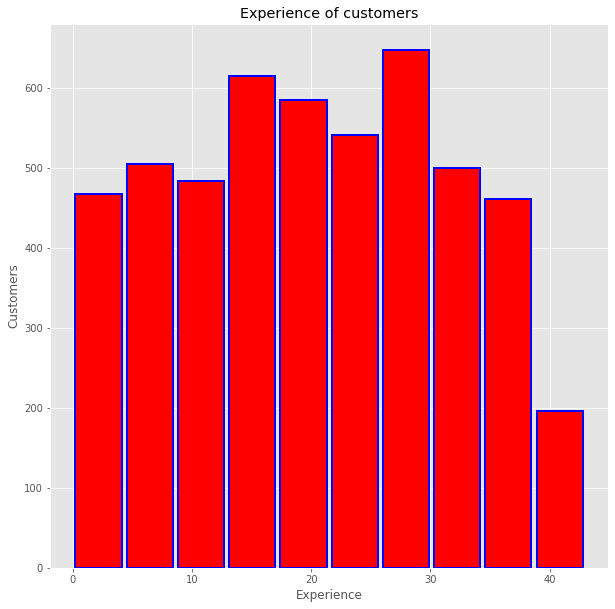

In [ ]:
# Now we will analyze our data by plotting different graphs.
plt.figure(figsize=(10,10))
style.use("ggplot")
plt.title("Experience of customers")
plt.xlabel("Experience")
plt.ylabel("Customers")
plt.hist(df["Experience"],color="red",rwidth=0.9,edgecolor="blue",linewidth=2)
plt.show()

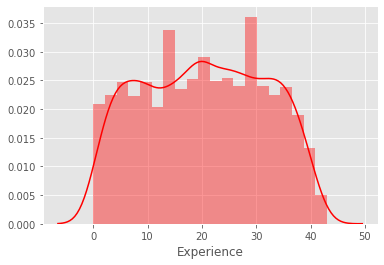

In [ ]:
sns.distplot(df["Experience"],color="Red");   #It is normally distributed.

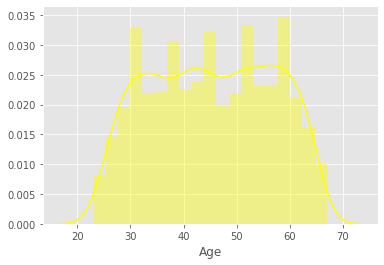

In [ ]:
sns.distplot(df["Age"],color="yellow")      #It is also normally distributed

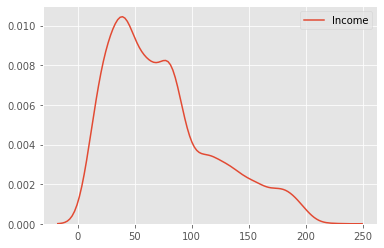

In [ ]:
sns.kdeplot(df["Income"])

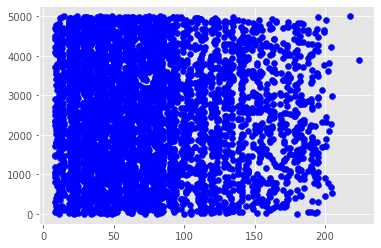

In [ ]:
plt.scatter(df["Income"],df.index,color="blue")

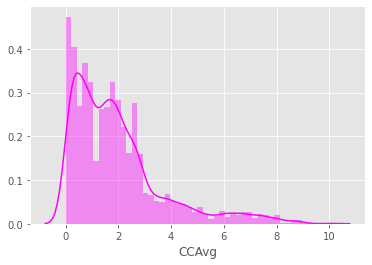

In [ ]:
sns.distplot(df["CCAvg"],color="magenta")

In [ ]:
df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

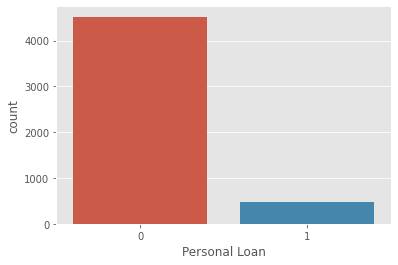

In [ ]:
sns.countplot(df["Personal Loan"])      #It shows that there are 4520 people who will not get loan while there are only 480 people who will get loan

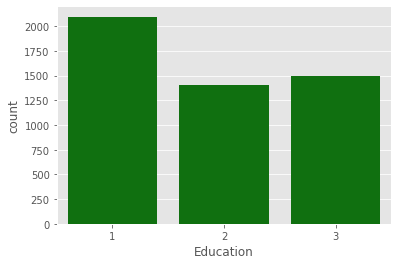

In [ ]:
sns.countplot(df["Education"],color="green")

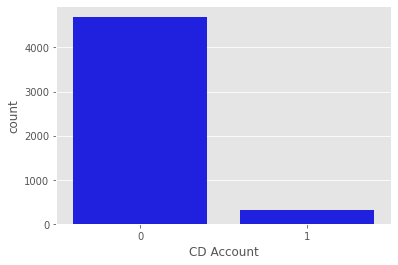

In [ ]:
sns.countplot(df["CD Account"],color="blue")

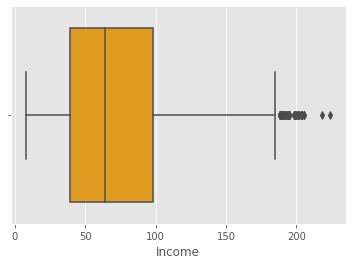

In [ ]:
sns.boxplot(df["Income"],color="orange")

**5.2 BIVARIATE ANALYSIS**

In [ ]:
# Now we will do some bivariate analysis in order to understand the relation between variables graphically.

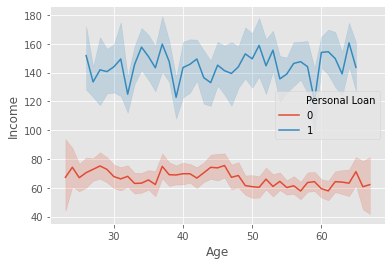

In [ ]:
sns.lineplot(x="Age", y="Income", hue='Personal Loan', data=df);

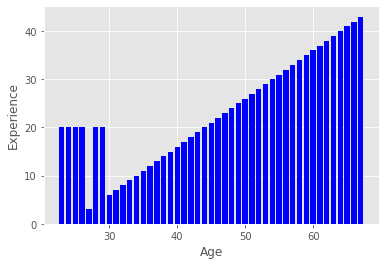

In [ ]:
plt.bar(df["Age"],df["Experience"],color="Blue")
plt.xlabel("Age")
plt.ylabel("Experience")
plt.show()

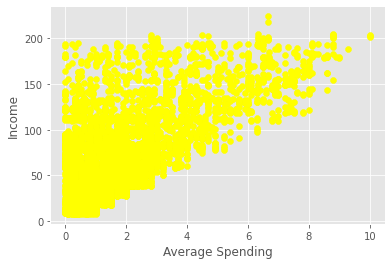

In [ ]:
plt.scatter(df["CCAvg"],df["Income"],color="yellow")
plt.xlabel("Average Spending")
plt.ylabel("Income")
plt.show()

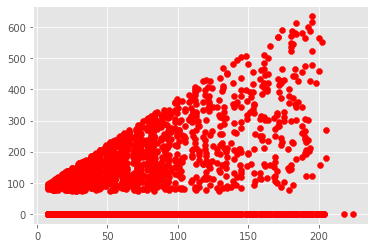

In [ ]:
plt.scatter(df["Income"],df["Mortgage"],color="red")

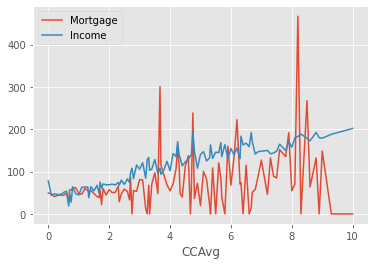

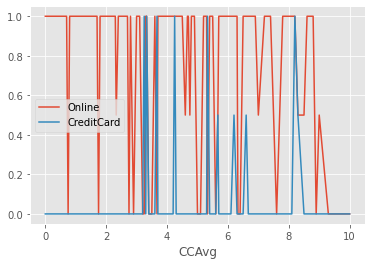

In [ ]:
df1 = df.groupby('CCAvg').mean()[['Mortgage','Income']]
df1.plot.line()
df2 = df.groupby('CCAvg').median()[['Online','CreditCard']]
df2.plot.line()

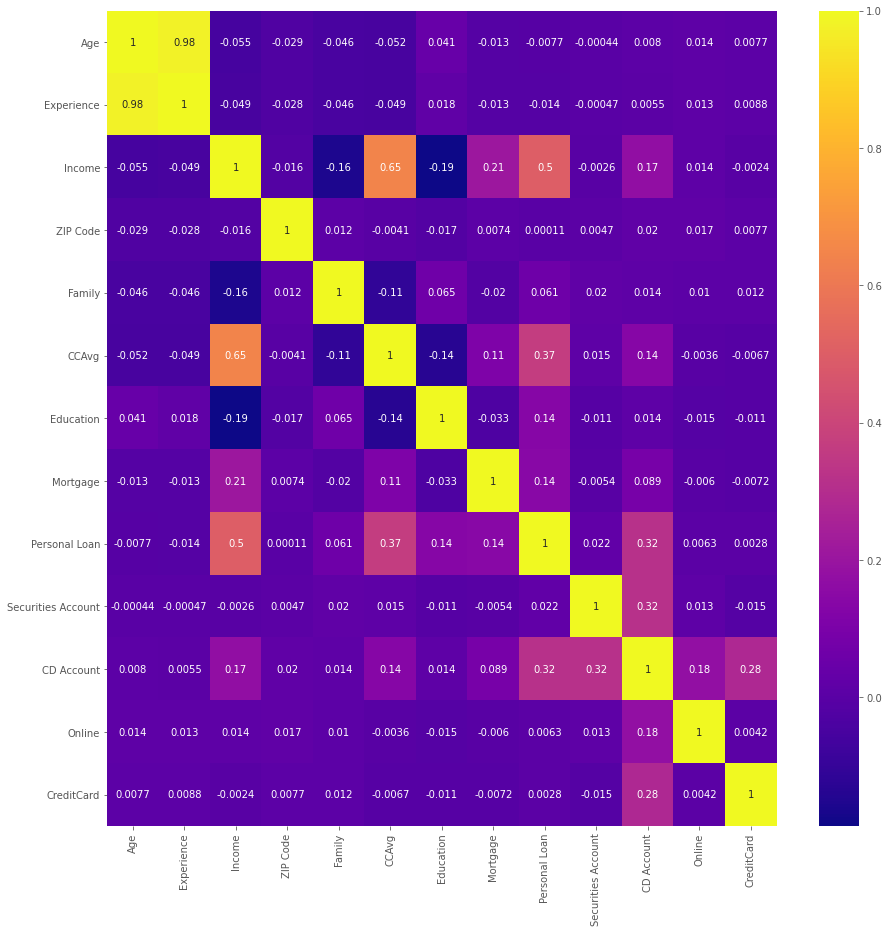

In [ ]:
figure,axes = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr() , cmap="plasma",annot=True )

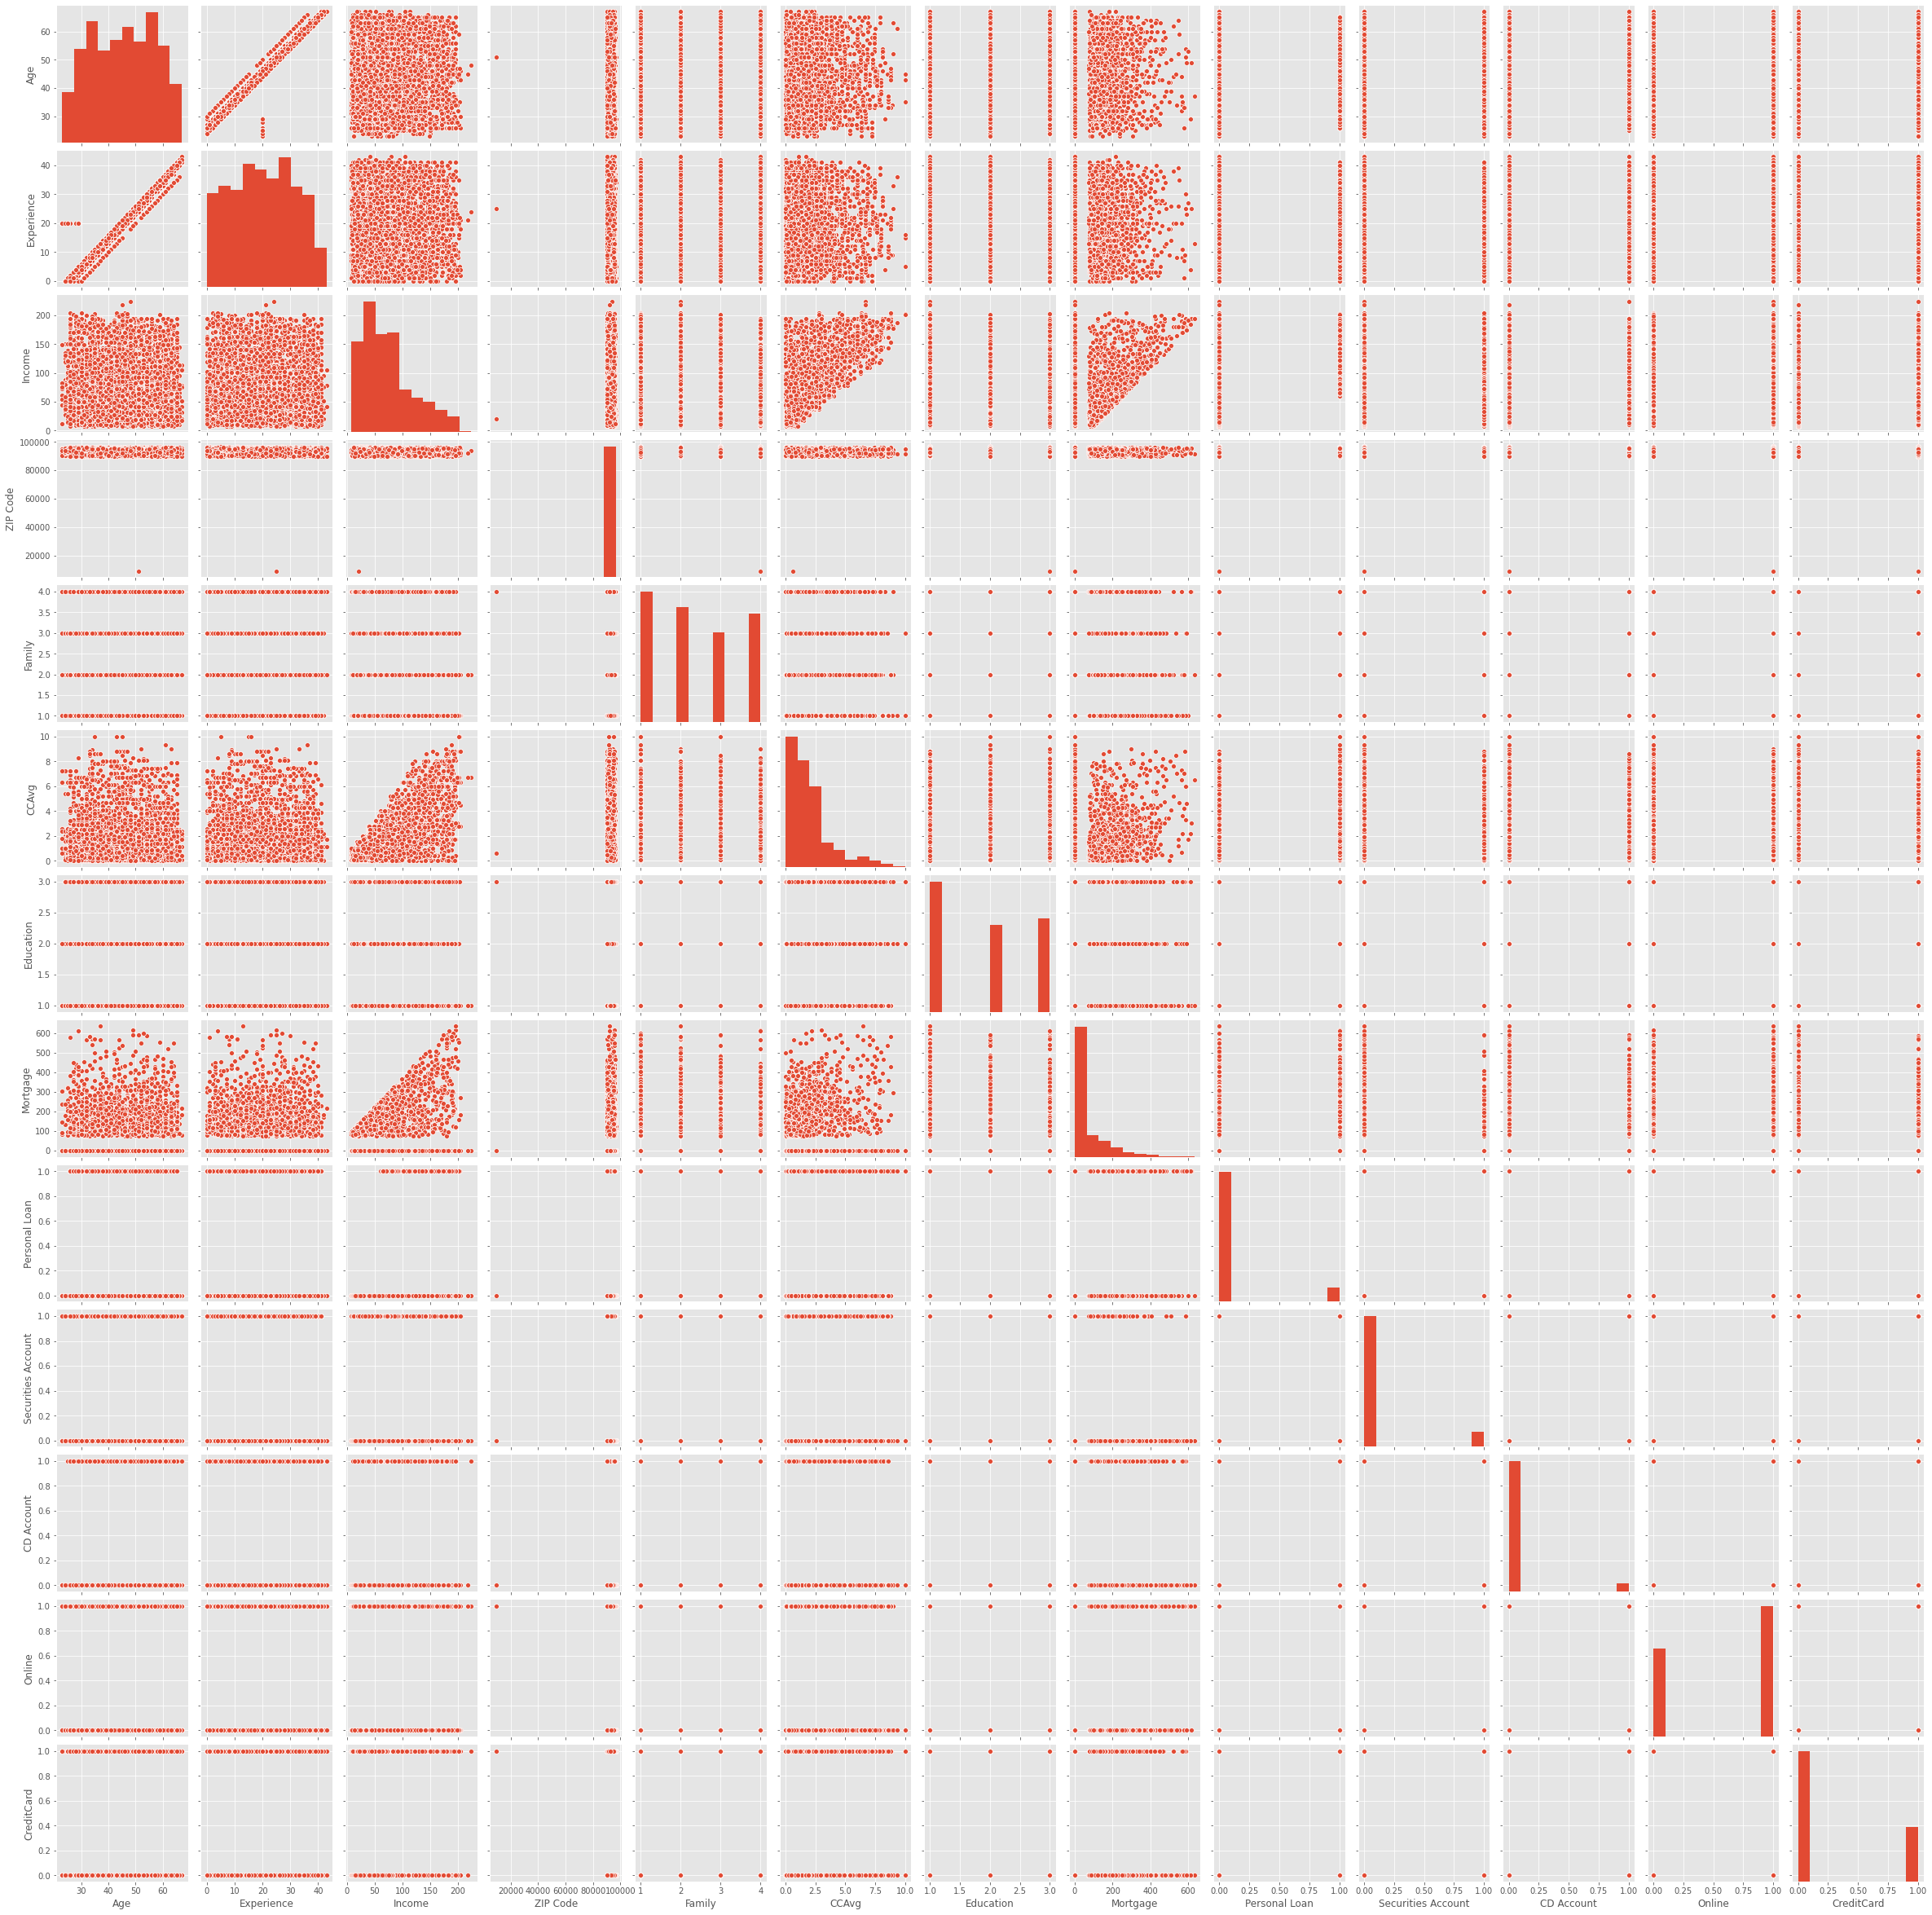

In [ ]:
sns.pairplot(df)    #to get a broader perspective

# **STEP 4 : TRANSFORMATION FOR THE FEATURE VARIABLE**

**Now, we have a highly skewed Distribution of Income feature. It can be classified as a log-normal distribution which means if we apply log transformation to Income, resulting distribution will be similar to a Gaussian. so, We will use Yeo-Johnson method from scikit-learn, PowerTransformer. The reuslting distribution is as shown below:**

In [ ]:
df_x=df.loc[:,df.columns != "Personal Loan"]
df_y=df[["Personal Loan"]]

**Now, the income is normally distributed**

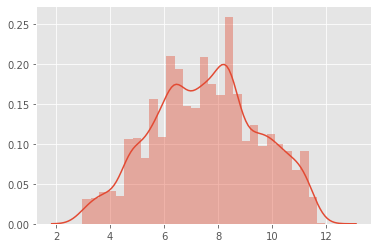

In [ ]:
p_tr=PowerTransformer(method="yeo-johnson", standardize=False)
p_tr.fit(df_x["Income"].values.reshape(-1,1))
sns.distplot(p_tr.transform(df_x["Income"].values.reshape(-1,1)))

**To make the variable CCAvg as normally distributed**

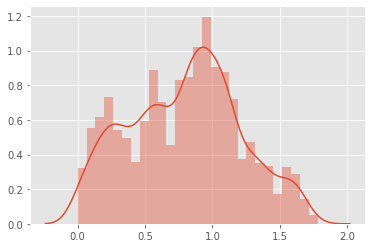

In [ ]:
p_tr=PowerTransformer(method="yeo-johnson", standardize=False)
p_tr.fit(df_x["CCAvg"].values.reshape(-1,1))
sns.distplot(p_tr.transform(df_x["CCAvg"].values.reshape(-1,1)))

In [ ]:
df_x["Mortgage_Int"]=pd.cut(df_x["Mortgage"],bins=[100,200,300,400,500,600,700,800],labels=[0,1,2,3,4,5,6],include_lowest=True)
df_x.drop("Mortgage",axis=1,inplace=True)

In [ ]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# **STEP-5: Now,Normalise the data and split the data into training and test set in the ratio of 70:30 respectively**

In [ ]:

target = 'Personal Loan'
df_x = df.drop(target,axis='columns',inplace=False)
df_y = df[target]

x_train,x_test,y_train,y_test = train_test_split(df_x, df_y,test_size=0.30,random_state=0,stratify=df_y)

**Now let's perform 'Standardization' on our Dataset to increase our learning performance. StandardScaler of scikit-learn will be used. A StandardScaler is fit to the feature in x_train, then this scaler transforms the same feature in x_train and x_test. This process is repeated for all features**

In [ ]:
for ind, column in enumerate(x_train.columns):
    scaler = StandardScaler()

    # fit to the training data
    scaler.fit(x_train[[column]])

    # transform the training data
    np_array = scaler.transform(x_train[[column]])
    x_train.loc[:, column] = pd.Series(np_array.flatten())

    # transform the test data
    np_array = scaler.transform(x_test[[column]])
    x_test.loc[:, column] = pd.Series(np_array.flatten())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

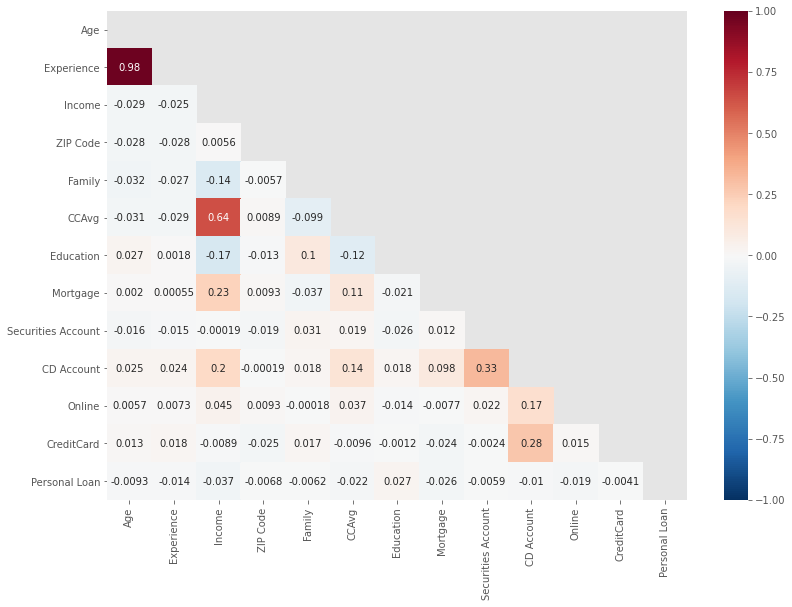

In [ ]:
corr_matrix = pd.concat([x_train, y_train], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(13,9))
sns.heatmap(corr_matrix,annot=True,vmin=-1,vmax=1,center=0, mask=mask,cmap="RdBu_r");

**Age and Experience features have very high correlation, 0.99. It is also understandable that experience increases as age increases. Correlated features degrade the learning performance.so,we drop Experience feature from both x_train and y_train**

In [ ]:
x_train.drop("Experience", axis=1, inplace=True)
x_test.drop("Experience", axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# **STEP 6: Now,use the Logistic Regression model to predict the likelihood of a customer buying personal loans.**

In [ ]:
target = 'Personal Loan'
df_x = df.drop(target,axis='columns',inplace=False)
df_y = df[target]

x_train,x_test,y_train,y_test = train_test_split(df_x, df_y,test_size=0.30,random_state=100,stratify=df_y)

In [ ]:
Log_R = LogisticRegression(max_iter=1000)
Log_R.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_prediction = Log_R.predict(x_test)
print("Accuracy :",accuracy_score(y_test,y_prediction)*100)

Accuracy : 91.26666666666667


# **STEP 7:Print all the metrics related for evaluating the model performance**

**CHECKING THE PERFORMANCE METRICS**

In [ ]:
Log_R.score(x_train, y_train)

0.906

In [ ]:
Log_R.score(x_test, y_test)

0.9126666666666666

In [ ]:
Log_predict = Log_R.predict(x_test)

**CHECKING THE CONFUSION METRICS**

In [ ]:
c_logmodel = confusion_matrix(y_test, Log_predict, labels=[0,1])
print(c_logmodel)

print(classification_report(y_test,Log_predict))

ac_score = accuracy_score(y_test, Log_predict)
f1_score = f1_score(y_test, Log_predict)
print("Accuracy Score  for Logistic Regression is: {}".format(ac_score * 100))
print("F1 Score  for Logistic Regression is: {}".format(f1_score * 100))

[[1320   36]
 [  95   49]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1356
           1       0.58      0.34      0.43       144

    accuracy                           0.91      1500
   macro avg       0.75      0.66      0.69      1500
weighted avg       0.90      0.91      0.90      1500

Accuracy Score  for Logistic Regression is: 91.26666666666667
F1 Score  for Logistic Regression is: 42.79475982532751


# **STEP 8:Build various other classification algorithms and compare their performance**

# **1.DECISION TREE MODEL**

In [ ]:

clf = DecisionTreeClassifier()
cl = clf.fit(x_train,y_train)

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=["ID",'Age','Income','Family','CCAvg','Online','CreditCard','Education', 
                                                                  'Mortgage', 'Securities Account', 'CD Account','Personal Loan'],filled=True, rounded=True) 
graph = graphviz.Source(dot_data)

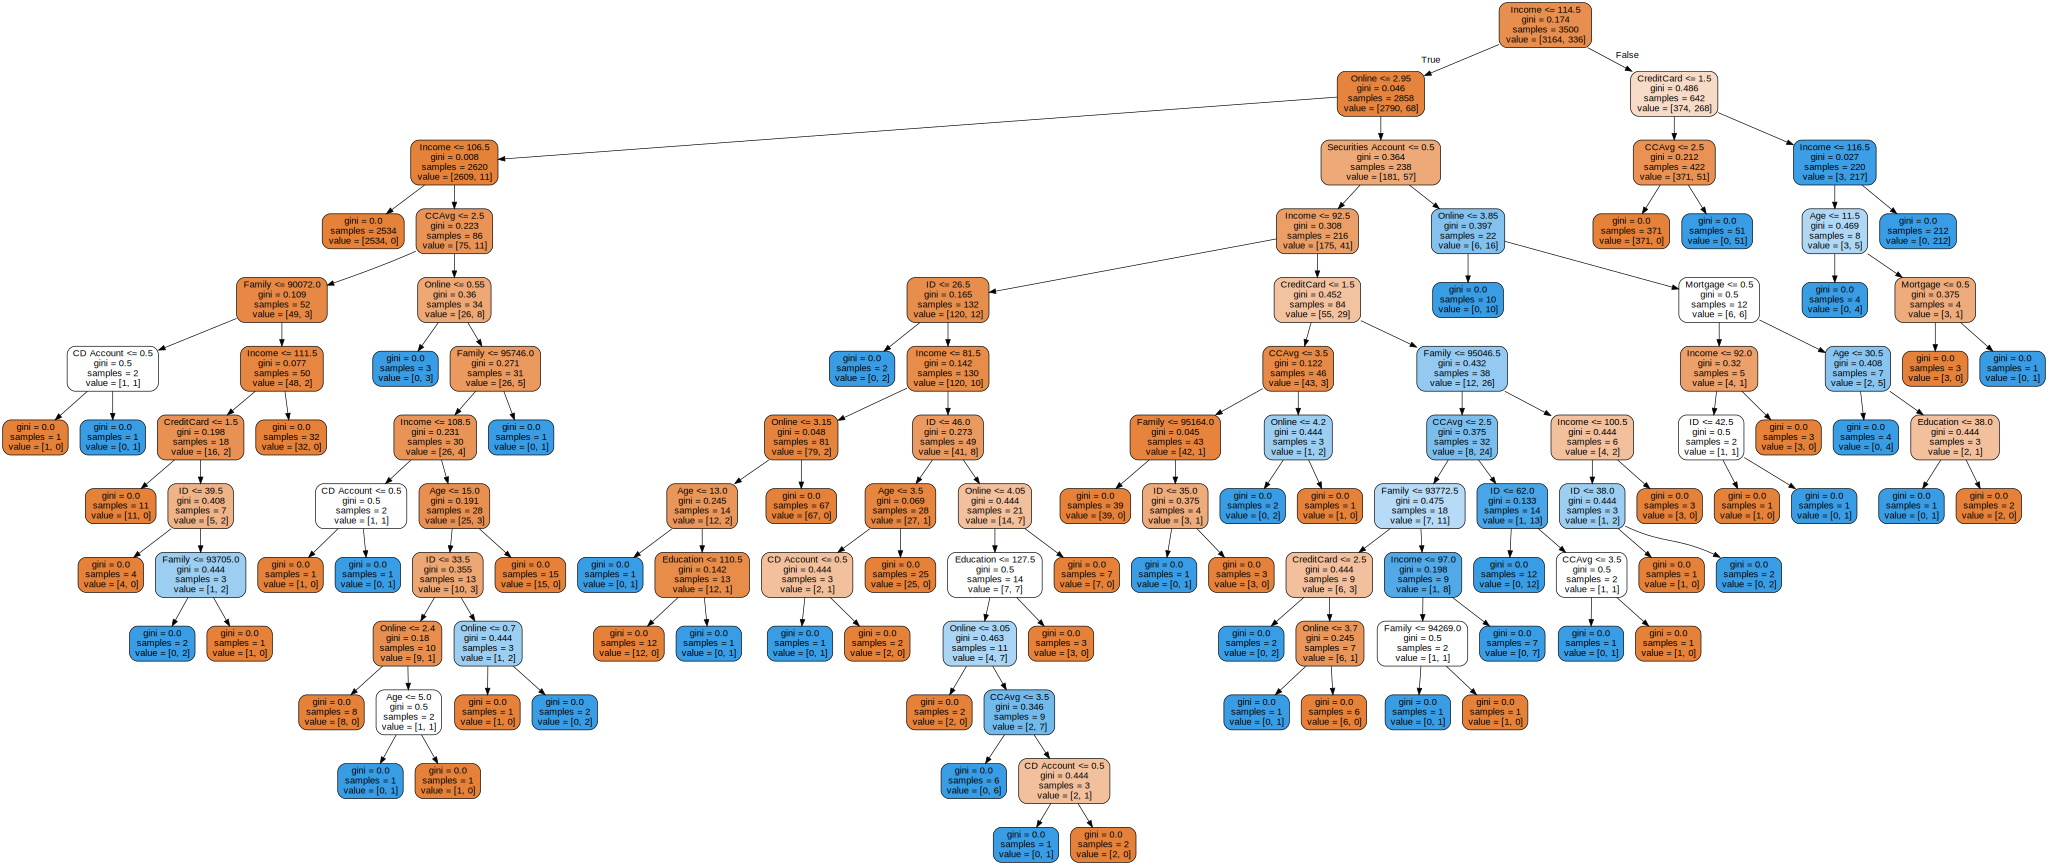

In [ ]:
graph

**Now checking the accuracy of this model**

In [ ]:
y_pred = clf.predict(x_test)
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.017333333333333333
R2 score: 0.8002704031465093
Accuracy score for test data 0.9826666666666667


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**ACCURACY SCORE**

In [ ]:
print(metrics.accuracy_score(y_train, model.predict(x_train)))

0.906


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.92      0.90      0.91       144

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



# **2. K-Nearest Neighbours (KNN) Model**



**Now we will check the accuracy with this model**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=25)

In [ ]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
KNeighborsClassifier(n_neighbors=25)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
knn_model.score(x_train, y_train)

0.9054285714285715

In [ ]:
knn_model.score(x_test, y_test)

0.9046666666666666

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.92      0.90      0.91       144

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



# **3. RANDOM FOREST MODEL**

In [ ]:

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.013333333333333334
R2 score: 0.8463618485742379
Accuracy score for train data 0.906
Accuracy score for test data 0.9866666666666667


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.88      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



# **4. NAIVE BAYES**

In [ ]:

model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.10933333333333334
R2 score: -0.259832841691249
Accuracy score for test data 0.8906666666666667


In [ ]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.8874285714285715


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1258   98]
 [  66   78]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1356
           1       0.44      0.54      0.49       144

    accuracy                           0.89      1500
   macro avg       0.70      0.73      0.71      1500
weighted avg       0.90      0.89      0.90      1500



# **STEP 9: GIVE A BUSSINESS UNDERSTANDING OF THE MODEL**

**FINAL CONCLUSION**

**SO,WE HAVE FINALLY REACHED TO THE END OF THE PROJECT IN WHICH THERE WERE SOME OF THE VARIABLES LIKE THE NUMERICAL VARIABLES AND CATEGORICAL VARIABLES WHICH AFFECT THE PARAMETER PERSONAL LOAN AND THE AIM OF THE PROJECT WAS TO PREDICT WHETHER THE PERSON WILL GET LOAN OR NOT AND IT DEPENDS ON WHICH PARAMETERS.**

**THE INFERENCES ARE THE FOLLOWING:**

**By performing the EDA we get to explore our data and find out that there are  3462 people with 0 mortage and Number of people with zero credit card spending per month is 106. Then we perform the univariate and bivariate analysis and we found out the relationship between different variables.Then we found out that the variable income is highly skewed so we perform transformation on the income feature variable and then we made it's distribution normal. We also print some metrics like the confusion metrics.**

**Then finally we perform logistic regression in order to predict the accuracy and the training and the testing results. The results are as follows.**

**1. DECISION TREE MODEL**
                              
                 precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.92      0.91       144
                                           
    accuracy                           0.98      1500

  macro avg       0.95      0.95      0.95      1500

 weighted avg       0.98      0.98      0.98      1500                           



**2. K-Nearest Neighbours (KNN) Model**

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.92      0.91       144

    accuracy                           0.98      1500

   macro avg       0.95      0.95      0.95      1500

  weighted avg       0.98      0.98      0.98      1500

**3.RANDOM FOREST MODEL**

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.99      0.88      0.93       144


    accuracy                           0.99      1500

   macro avg       0.99      0.94      0.96      1500

weighted avg       0.99      0.99      0.99      1500

**4. NAIVE BAYES**

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1356
           1       0.44      0.54      0.49       144

    accuracy                           0.89      1500

   macro avg       0.70      0.73      0.71      1500

   weighted avg       0.90      0.89      0.90      1500

SO, FROM ALL THESE MODELS WE PREDICTED OUT THAT RANDOM FOREST IS THE BEST CLASSIFICATION MODEL WHICH GIVES THE BEST RESULTS AND GOOD ACCURACY. 

# **THANK YOU**